线性回归模型是最重要的数学模型之一，很多模型都是建立在它的基础之上。

# 最小二乘法

## 损失函数
- 在机器学习中，所有的算法模型其实都依赖于最小化或最大化某一个函数，我们称之为“目标函数”。最小化的这组函数被称为“损失函数”。
- 损失函数描述了单个样本预测值和真实值之间误差的程度。损失函数是衡量预测模型预测期望结果表现的指标。损失函数越小，模型的鲁棒性越好。

### 常用损失函数

#### 0-1损失函数
- 用来表述分类问题，当预测分类错误时，损失函数值为1，正确为0。
- L(Y,f(X)):当Y=f(X),值为0；当Y≠f(X),值为1。

#### 平方损失函数
- 用来描述回归问题，用来表示连续性变量，为预测值与真实值差值的平方。（误差值越大、惩罚力度越强，也就是对差值敏感）。
- L(Y,f(X))=(Y-f(X))*(Y-f(X))

#### 绝对损失函数
- 用在回归模型，用距离的绝对值来衡量
- L(Y,f(X))=|Y-f(X)|

#### 对数损失函数
- 是预测值Y和条件概率之间的衡量。使用极大似然估计的思想。
- 在当前模型的基础上，对于样本X，其预测值为Y，也就是预测正确的概率。由于概率之间的同时满足需要使用乘法，为了将其转化为加法，我们将其取对数。最后由于是损失函数，所以预测正确的概率越高，其损失值应该是越小，因此再加个负号取个反。
- L(Y,f(X))=-logP(Y|X)

## 风险函数
- 一个训练数据集中存在N个样本，N个样本给出N个损失，如何进行选择呢？引出了风险函数。

### 期望风险
- 期望风险是损失函数的期望，用来表达理论上模型f(X)关于联合分布P(X,Y)的平均意义下的损失。又叫期望损失/风险函数。
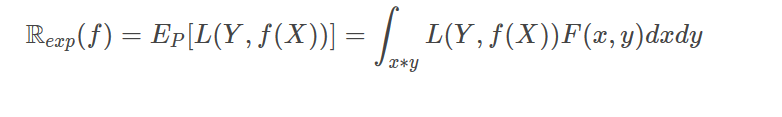

### 经验风险
- 模型f(X)关于训练数据集的平均损失，称为经验风险或经验损失。
- 模型关于训练集的平均损失（每个样本的损失加起来，然后平均一下）。
- 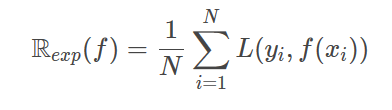
- 经验风险最小的模型为最优模型。argmin(R(f))。

### 结构风险
- 当样本容量不大的时候，经验风险最小化容易产生“过拟合”的问题，为了“减缓”过拟合问题，提出了结构风险最小理论。结构风险最小化为经验风险与复杂度同时较小。
- 在经验风险上加上一个正则化项(regularizer)，或者叫做罚项(penalty) 。正则化项是J(f)是函数的复杂度再乘一个权重系数（用以权衡经验风险和复杂度）。
- 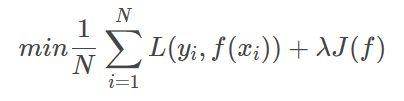

###  小结
- 期望风险是模型关于联合分布的期望损失，经验风险是模型关于训练样本数据集的平均损失。根据大数定律，当样本容量N趋于无穷时，经验风险趋于期望风险。
- 因此，一般用经验风险去估计期望风险。

## 最小二乘法
- 最小二乘法源于法国数学家阿德里安的猜想：对于测量值来说，让总的误差的平方最小的就是真实值。基于“若误差是随机的，应该围绕真值上下波动”。
- 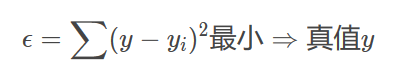
- 为了求出这个二次函数的最小值，对其进行求导，导数为0的时候取得最小值.

# 简单线性回归

- 即 一元线性回归
- 已知训练数据样本x、y，找到a和b的值，使均方误差（(y(i)-ax(i)-b)(i=1,2,...)的平方和）尽可能小

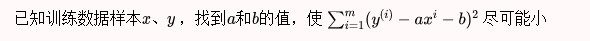

- 通过最小二乘法求出a、b的表达式：

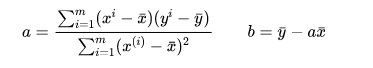

## 代码

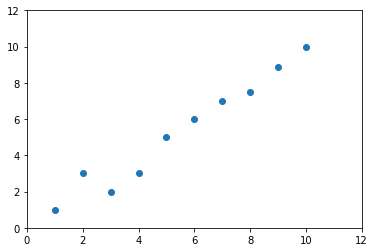

In [16]:
# 自己构建数据

import numpy as np
import matplotlib.pyplot as plt 

x=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10])
y=np.array([1.,3.,2.,3.,5.,6.,7.,7.5,8.9,10])

plt.scatter(x,y)
plt.axis([0,12,0,12])
plt.show()

### 常规运算

In [8]:
# 首先要计算x和y的均值
x_mean=np.mean(x)
y_mean=np.mean(y)


In [11]:
# 然后求a、b 
# a的分子num、分母d
num=0.0
d=0.0

# zip函数打包成[(x_i,y_i)...]的形式
for x_i,y_i in zip(x,y):
    num=num+(x_i-x_mean)*(y_i-y_mean)
    d=d+(x_i-x_mean)**2
    
a=num/d
b=y_mean-a*x_mean


In [19]:
a

0.9866666666666667

In [20]:
b

-0.08666666666666689

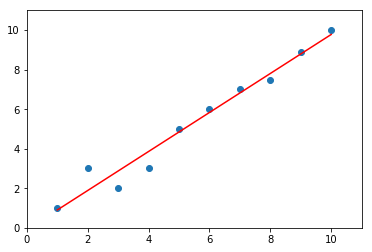

In [15]:
# 建模
y_hat=a*x+b

plt.scatter(x,y)    # 绘制散点图
plt.plot(x,y_hat,color='r')    # 绘制直线
plt.axis([0,11,0,11])
plt.show()

In [18]:
# 预测

x_predict = 12
y_predict = a * x_predict + b
print(y_predict)

11.753333333333334


### 向量化运算
- 使用np.dot
- 向量化是非常常用的加速计算的方式，特别适合深度学习等需要训练大数据的领域。

In [29]:
num_dot=np.dot(x-x_mean,y-y_mean)  # 分子
d_dot=np.dot(x-x_mean,x-x_mean)    # 分母

a_dot=num_dot/d_dot
b_dot=y_mean-a_dot*x_mean

In [32]:
a_dot

0.9866666666666667

In [31]:
b_dot

-0.08666666666666689

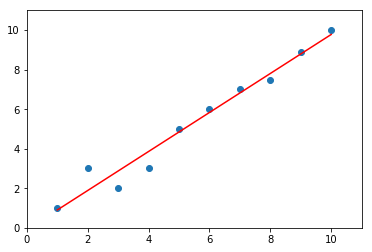

In [33]:
# 建模
y_hat=a_dot*x+b_dot

plt.scatter(x,y)    # 绘制散点图
plt.plot(x,y_hat,color='r')    # 绘制直线
plt.axis([0,11,0,11])
plt.show()

### 完整代码 
- 保存到 LinearRegression.py 文件

In [53]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        """模型初始化函数"""
        self.a_=None
        self.b_=None
        
    def fit(self,x_train,y_train):
        """根据训练数据集x_train,y_train训练模型"""
        assert x_train.ndim==1,\
            """简单线性回归模型仅能够处理一维特征向量"""
        assert x_train.shape[0]==y_train.shape[0],\
            """特征向量的长度和标签的长度相同"""
        x_mean=np.mean(x_train)
        y_mean=np.mean(y_train)
        num=np.dot(x_train - x_mean,y_train - y_mean)  # 分子
        d=np.dot(x_train - x_mean,x_train - x_mean)  # 分母
        self.a_=num/d
        self.b_=y_mean - self.a_ * x_mean
        
        return self
        
    def predict(self,x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim==1,\
            """简单线性回归模型仅能够处理一维特征向量"""
        assert self.a_ is not None and self.b_ is not None,\
            """先训练之后才能预测"""
        return np.dot(x_predict,self.a_)+self.b_
    
    def predict_single(self, x_single):
        """给定单个待预测数据x_single，返回x_single的预测结果值"""
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        """返回一个可以用来表示对象的可打印字符串"""
        return "SimpleLinearRegression()"

In [54]:
slr=SimpleLinearRegression()

In [55]:
slr.fit(x,y)

SimpleLinearRegression()

In [56]:
slr.a_

0.9866666666666667

In [57]:
slr.b_

-0.08666666666666689

In [59]:
slr.predict(np.array([20,21,22]))

array([19.64666667, 20.63333333, 21.62      ])

In [58]:
slr.predict_single(18)

17.673333333333336

# 多元线性回归

## 数学原理
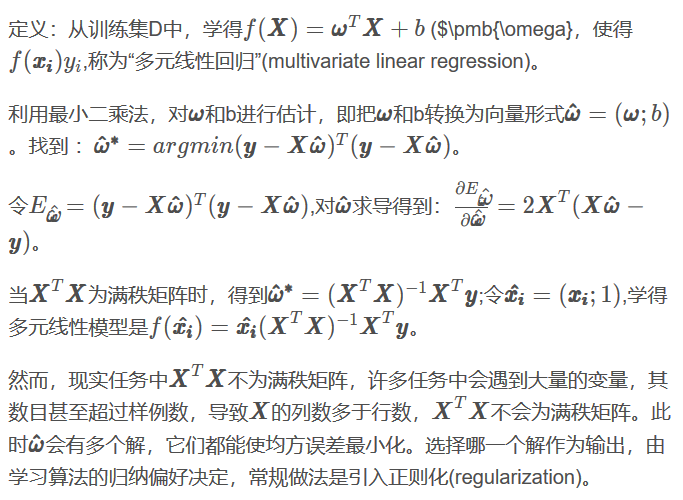

## 代码实现
- 保存到 LinearRegression.py 文件

In [159]:
import numpy as np
from myML_Algorithm.metrics import r2_score

class linearRegression:
    
    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_=None          # 系数（theta0~1 向量）
        self.interception_=None  #  截距（theta0 数）
        self._theta=None         # 整体计算出的向量theta
        
    def fit(self,X_train,y_train):
        """根据训练数据X_train，y_train训练Linear Regression模型"""
        assert X_train.shape[0]==y_train.shape[0],\
            "the size of X_train must be equal to the size of y_train"
        # 正规化方程求解
        X_b=np.hstack([np.ones((X_train.shape[0],1)),X_train])
        self._theta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        
        self.interception_=self._theta[0]        
        self.coef_=self._theta[1:]
        
        return self
        
    def predict(self,X_predict):
        """给定待预测的数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None,\
            "must fit before predict"
        assert X_predict.shape[1]==self.coef_.shape[0],\
            "the feature number of X_predict must be equal to X_train"
        X_b=np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        y_predict=X_b.dot(self._theta)
        
        return y_predict
    
    def score(self,X_test,y_test):
        """根据测试集X_test和y_test确定当前模型的准确率"""
        y_predict=self.predict(X_test)
        #return r2_score(y_test,y_predict)
        return 1-np.sum((y_test-y_predict)**2)/(y_test.shape[0]*np.var(y_test))
    
    def __repr__(self):
        return "LinearRegression()"

部分方法使用说明：
- 1、np.hstack(tup)：参数tup可以是元组，列表，或者numpy数组，返回结果为numpy的数组。按列顺序把数组给堆叠起来（加一个新列）。
- 2、np.ones()：返回一个全1的n*m数组，有三个参数：shape（元组类型,用来指定返回数组的大小,n*m）、dtype（数组元素的类型）、order（是否以内存中的C或Fortran连续（行或列）顺序存储多维数据）。后两个参数都是可选的，一般只需设定第一个参数。（类似的还有np.zeros()返回一个全0数组）
- 3、numpy.linalg模块包含线性代数的函数。使用这个模块，可以计算逆矩阵(inv)、求特征值、解线性方程组(solve)以及求解行列式(det)等。inv函数计算逆矩阵
- 4、T：array的方法，对矩阵进行转置。
- 5、dot：点乘

## 小应用

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

In [178]:
from myML_Algorithm.model_selection import train_test_split as tts
from myML_Algorithm.LinearRegression import linearRegression as lrr
from myML_Algorithm.metrics import r2_score as r2_score_
X_train, X_test, y_train, y_test = tts(X, y, seed = 50)

lreg=lrr()
lreg.fit(X_train,y_train)

LinearRegression()

In [176]:
lreg.coef_   # 系数

array([-9.43623898e-02,  4.18283955e-02, -4.89499400e-02, -9.99601763e-02,
       -1.31625298e+01,  3.80163889e+00, -2.12290866e-02, -1.22647034e+00,
        2.58312102e-01, -1.31537825e-02, -8.32294595e-01,  8.23018477e-03,
       -3.49330903e-01])

In [177]:
lreg.interception_  #常数项b

31.732920374230954

In [179]:
r2_score_(y_test,lreg.predict(X_test))

0.7612555207969119

## sklearn 实现线性回归

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [182]:
lr.coef_

array([-9.43623898e-02,  4.18283955e-02, -4.89499400e-02, -9.99601763e-02,
       -1.31625298e+01,  3.80163889e+00, -2.12290866e-02, -1.22647034e+00,
        2.58312102e-01, -1.31537825e-02, -8.32294595e-01,  8.23018477e-03,
       -3.49330903e-01])

In [183]:
lr.intercept_

31.732920374246977

In [184]:
lr.score(X_test,y_test)

0.7612555207969263